In [33]:
# Import libraries
import os

import numpy as np
import pandas as pd


In [34]:
df_finbert = pd.read_csv(os.path.join('..', 'data', 'RedditNews_FinBert.csv'))
df_vader = pd.read_csv(os.path.join('..', 'data', 'APPLE_Vader.csv'))

df_stock = pd.read_csv(os.path.join('..', 'data','upload_DJIA_table_preprocessed.csv'))

In [35]:
# Calculate the mean sentiment score for each stock for each day
df_finbert = df_finbert.groupby('Date') \
       .agg({'sentiment_FinBert_positive':'mean',
            'sentiment_FinBert_negative':'mean',
            'sentiment_FinBert_neutral':'mean'}) \
       .rename(columns={'sentiment_FinBert_positive':'sentiment_FinBert_positive',
                        'sentiment_FinBert_negative':'sentiment_FinBert_negative',
                        'sentiment_FinBert_neutral':'sentiment_FinBert_neutral'}) \
       .reset_index()

# Calculate the mean sentiment score for each stock for each day
df_vader = df_vader.groupby('release') \
       .agg({'sentiment_vader':'mean'}) \
       .reset_index() \
       .rename(columns={'release':'Date','sentiment_vader':'sentiment_vader'}) 

In [36]:
df_vader

,Date,sentiment_vader
0,2014-03-06,0.4404
1,2014-04-09,0.0000
2,2014-04-22,0.2960
3,2014-04-23,0.0000
4,2014-05-09,0.0000
...,...,...
701,2022-12-21,0.4215
702,2022-12-23,0.1280
703,2022-12-27,0.4404
704,2022-12-29,-0.1280


In [37]:
df_finbert = df_finbert.merge(df_stock[['Date', 'returns']], on='Date')
df_vader = df_vader.merge(df_stock[['Date', 'returns']], on='Date')

df_finbert['Date'] = pd.to_datetime(df_finbert['Date'])
df_vader['Date'] = pd.to_datetime(df_vader['Date'])

# set the index
df_finbert.set_index('Date', inplace=True)
df_vader.set_index('Date', inplace=True)

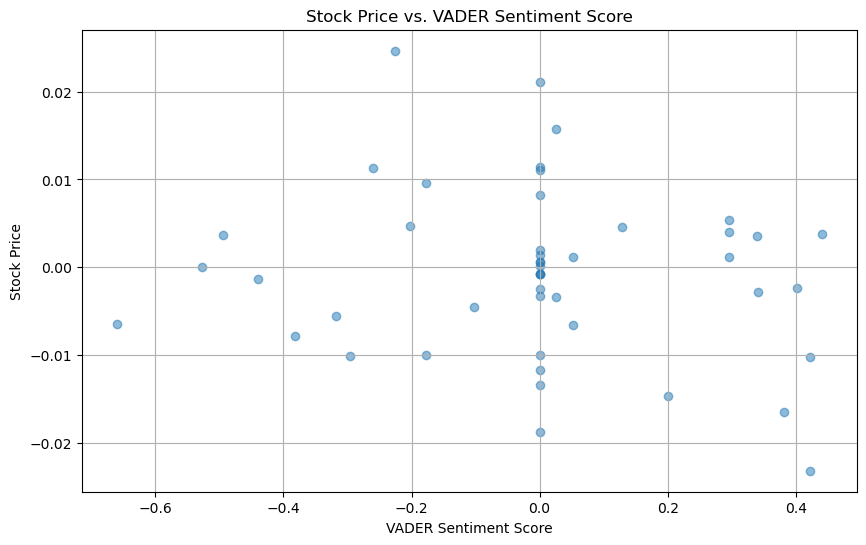

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_vader['sentiment_vader'], df_vader['returns'], alpha=0.5)
plt.title('Stock Price vs. VADER Sentiment Score')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()


In [39]:
correlation = df_vader['sentiment_vader'].corr(df_vader['returns'])
print(f'Correlation between VADER Score and Stock Price: {correlation:.2f}')

Correlation between VADER Score and Stock Price: -0.15
